<a href="https://colab.research.google.com/github/melvinps/python_machine_learning/blob/main/Callback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORT DATA**

Select Route by entering respectively location (eg. D01, e02)

---

Select Month by entering month number (eg. **4** for april, **5** for may)

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext google.colab.data_table
%matplotlib inline

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [400]:
df = pd.read_excel('2021 04 28 Daily Callbacks.xlsx')

In [401]:
df = df[['Location','Notification date','Name','Description of technical object','Description','Long Text Description']].dropna()

In [409]:
df['Notification date'] = pd.to_datetime(df['Notification date'])
df

Location Notification date                                      Name  \
0      808D01        2021-01-04                             HSBC BUILDING   
1      808D01        2021-01-22                             HSBC BUILDING   
2      808D01        2021-01-27                             HSBC BUILDING   
3      808D01        2021-02-12                             HSBC BUILDING   
4      808D01        2021-02-25                             HSBC BUILDING   
5      808D01        2021-02-25                             HSBC BUILDING   
6      808D01        2021-02-25                             HSBC BUILDING   
7      808D01        2021-02-27                             HSBC BUILDING   
8      808D01        2021-02-28                             HSBC BUILDING   
9      808D01        2021-03-07                             HSBC BUILDING   
10     808D01        2021-03-22                             HSBC BUILDING   
11     808D01        2021-03-29                             HSBC BUILDING   
12     808D01        2021-02-17                             HSBC BUILDING   
13     808D01        2021-02-19                             HSBC BUILDING   
14     808D01        2021-02-25                             HSBC BUILDING   
15     808D01        2021-03-03                             HSBC BUILDING   
16     808D01        2021-03-18                             HSBC BUILDING   
17     808D01        2021-03-22                             HSBC BUILDING   
18     808D01        2021-03-27                             HSBC BUILDING   
19     808D01        2021-03-31                             HSBC BUILDING   
20     808D01        2021-04-03                             HSBC BUILDING   
21     808D01        2021-04-15                             HSBC BUILDING   
22     808D01        2021-04-23                             HSBC BUILDING   
23     808D01        2021-04-24                             HSBC BUILDING   
24     808D01        2021-04-25                             HSBC BUILDING   
25     808D01        2021-04-27                             HSBC BUILDING   
26     808D01        2021-02-16                             HSBC BUILDING   
27     808D01        2021-02-16                             HSBC BUILDING   
28     808D01        2021-02-15                             HSBC BUILDING   
29     808D01        2021-02-14                             HSBC BUILDING   
30     808D01        2021-02-14                             HSBC BUILDING   
31     808D01        2021-02-12                             HSBC BUILDING   
32     808D01        2021-02-11                             HSBC BUILDING   
33     808D01        2021-02-05                             HSBC BUILDING   
34     808D01        2021-02-05                             HSBC BUILDING   
35     808D01        2021-01-21                             HSBC BUILDING   
36     808D01        2021-01-20                             HSBC BUILDING   
37     808D01        2021-01-05                             HSBC BUILDING   
38     808D01        2021-01-02                             HSBC BUILDING   
39     808D01        2021-01-01                             HSBC BUILDING   
40     808D01        2021-01-13                              ASO BUILDING   
41     808D01        2021-02-19                              ASO BUILDING   
42     808D01        2021-02-22                 135 CECIL STREET (2W-LKN)   
43     808D01        2021-02-19                 135 CECIL STREET (2W-LKN)   
44     808D01        2021-02-07                 135 CECIL STREET (2W-LKN)   
45     808D01        2021-01-28                 135 CECIL STREET (2W-LKN)   
46     808D01        2021-01-15                 135 CECIL STREET (2W-LKN)   
47     808D01        2021-01-13                 135 CECIL STREET (2W-LKN)   
48     808D01        2021-01-19                 135 CECIL STREET (2W-LKN)   
49     808D01        2021-02-20                 135 CECIL STREET (2W-LKN)   
50     808D01        2021-02-27                 135 CECIL STREET (2W-LKN)   
5

**Skip if do not want to filter by routes or date**

In [403]:
route = input('Enter Route: ')
route = '808' + route.upper()
print('Route: ' + route)

Enter Route: d01
Route: 808D01


In [404]:
m = input('Enter the month of notification date: ')
print('Month selected: ' + m)

Enter the month of notification date: 4
Month selected: 4


In [406]:
df_route_sick = df.loc[(df['Location'] == route) & (df['Notification date'].dt.month == int(m))]
df_route = df.loc[(df['Location'] == route)]
df_route_date = df_route.loc[df_route['Notification date'].dt.month == int(m)]

### **SICK UNIT**

In [407]:
if route == '808':
  df_sick = df
else:
  df_sick = df_route_sick


df_sick.groupby(['Location','Name','Description of technical object']).count()
df_sick['No. of Callbacks'] = df_sick.groupby(['Location','Name','Description of technical object'])['Notification date'].transform('count')
df_sick = df_sick[df_sick['No. of Callbacks']>=3] 
df_sick = df_sick.drop(['Notification date',	'Description', 'Long Text Description'], axis=1)
df_sick.groupby(['Location','Name','Description of technical object'],as_index = 'Location').count()#.sort_values(by=['No. of Callbacks'],ascending=False)

# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No. of Callbacks
Location Name                  Description of technical object                  
808D01   ALTEZ @ ENGGOR        PL3                                             5
                               PL4                                             3
         AMARA CORPORATE TOWER PL2                                             3
         BANK OF SINGAPORE     PLH (PL8) (FM)                                  8
         HSBC BUILDING         SF01                                            6
         ORIENTAL PLAZA        PL02                                            3
         SAMSUNG HUB           PLA                                             3

Location Notification date                                    Name  \
20    808D01        2021-04-03                           HSBC BUILDING   
21    808D01        2021-04-15                           HSBC BUILDING   
22    808D01        2021-04-23                           HSBC BUILDING   
23    808D01        2021-04-24                           HSBC BUILDING   
24    808D01        2021-04-25                           HSBC BUILDING   
25    808D01        2021-04-27                           HSBC BUILDING   
56    808D01        2021-04-19                       120 ROBINSON ROAD   
65    808D01        2021-04-21                         20 COLLYER QUAY   
66    808D01        2021-04-23                         20 COLLYER QUAY   
78    808D01        2021-04-24                            FEB BUILDING   
87    808D01        2021-04-16                           CAPITAL TOWER   
90    808D01        2021-04-05                           CAPITAL TOWER   
91    808D01        2021-04-12                           CAPITAL TOWER   
97    808D01        2021-04-05                           CAPITAL TOWER   
98    808D01        2021-04-22                           CAPITAL TOWER   
103   808D01        2021-04-25                           CAPITAL TOWER   
110   808D01        2021-04-13                           CAPITAL TOWER   
111   808D01        2021-04-21                           CAPITAL TOWER   
116   808D01        2021-04-26                           CAPITAL TOWER   
124   808D01        2021-04-12                           CAPITAL TOWER   
128   808D01        2021-04-26                    THE CLIFT(710-CLIFT)   
131   808D01        2021-04-15                    THE CLIFT(710-CLIFT)   
138   808D01        2021-04-03                             SAMSUNG HUB   
139   808D01        2021-04-18                             SAMSUNG HUB   
140   808D01        2021-04-20                             SAMSUNG HUB   
143   808D01        2021-04-15                             SAMSUNG HUB   
146   808D01        2021-04-21                             SAMSUNG HUB   
150   808D01        2021-04-01                             THE CENTRAL   
156   808D01        2021-04-20                             THE CENTRAL   
162   808D01        2021-04-05                             THE CENTRAL   
163   808D01        2021-04-15                             THE CENTRAL   
164   808D01        2021-04-20                             THE CENTRAL   
166   808D01        2021-04-13                             THE CENTRAL   
167   808D01        2021-04-17                             THE CENTRAL   
170   808D01        2021-04-06                             THE CENTRAL   
177   808D01        2021-04-27                             THE CENTRAL   
179   808D01        2021-04-02                             THE CENTRAL   
202   808D01        2021-04-08             79 ANSON ROAD   (MCST 2465)   
203   808D01        2021-04-08             79 ANSON ROAD   (MCST 2465)   
207   808D01        2021-04-05             79 ANSON ROAD   (MCST 2465)   
208   808D01        2021-04-22             79 ANSON ROAD   (MCST 2465)   
212   808D01        2021-04-05             79 ANSON ROAD   (MCST 2465)   
225   808D01        2021-04-20                     INTERNATIONAL PLAZA   
233   808D01        2021-04-18                     INTERNATIONAL PLAZA   
235   808D01        2021-04-01                     INTERNATIONAL PLAZA   
237   808D01        2021-04-08                     INTERNATIONAL PLAZA   
240   808D01        2021-04-25                     INTERNATIONAL PLAZA   
243   808D01        2021-04-04                     INTERNATIONAL PLAZA   
245   808D01        2021-04-28                          ORIENTAL PLAZA   
247   808D01        2021-04-09                          ORIENTAL PLAZA   
248   808D01        2021-04-11                          ORIENTAL PLAZA   
249   808D01        2021-04-21                          ORIENTAL PLAZA   
250   808D01        2021-04-06                             AMARA HOTEL   
254   80

In [411]:
df_route_date = df_route.loc[df_route['Notification date'].dt.month == int(m)]
df_route_date = df_route_date.sort_values(by='Notification date')
temp = df_route_date.drop(['Location', 'Notification date','Long Text Description'], axis=1)
temp.groupby(['Name','Description of technical object']).count()


Description
Name                                   Description of technical object             
120 ROBINSON ROAD                      VL1                                        1
20 COLLYER QUAY                        PL5(PLE)                                   2
251 NORTH BRIDGE ROAD                  PL01                                       1
78 SHENTON WAY (TWR 1)                 PL1                                        1
79 ANSON ROAD   (MCST 2465)            CP10 (FM)                                  1
                                       PL02 (FM)                                  1
                                       PL03 (FM)                                  1
                                       PL08 (FM)                                  2
ALTEZ @ ENGGOR                         FL1                                        1
                                       PL2                                        2
                                       PL3                                        5
                                       PL4                                        3
                                       PL6                                        1
AMARA CORPORATE TOWER                  PL2                                        3
AMARA HOTEL                            PL01                                       1
                                       SL09                                       1
BANK OF SINGAPORE                      PLC (PL2)(FM)                              2
                                       PLD (PL1) (SMOD)                           2
                                       PLG (PL7) (FM)                             1
                                       PLH (PL8) (FM)                             8
                                       SFL1                                       2
                                       VL1                                        1
                                       VL2                                        1
CAPITAL TOWER                          CPL3                                       1
                                       FL24                                       1
                                       PL10 (MID RISE)                            1
                                       PL13 (MID RISE)                            2
                                       PL17 (HIGH RISE)                           1
                                       PL18 (HIGH RISE)                           1
                                       SL25                                       2
                                       TL2(SHUTTLE LIFT)                          1
CENTENNIAL TOWER                       FS3                                        1
                                       L06                                        1
                                       L10                                        1
                                       M12                                        1
                                       M14                                        2
                                       M17                                        1
CHIJMES                                SL02                                       1
DUKE-NUS GRADUATE MEDICAL SINGAPORE    PL2                                        2
                                       SL5                                        2
FAR EAST SQUARE                        PL1                                        1
                                       PL2                                        1
FEB BUILDING                           FL4                                        1
GENTING CENTRE                         PL03                                       1
HIGH STREET CENTRE                     FL07                                       1
                                       PL03                                       1
HSBC BUILDING                          S

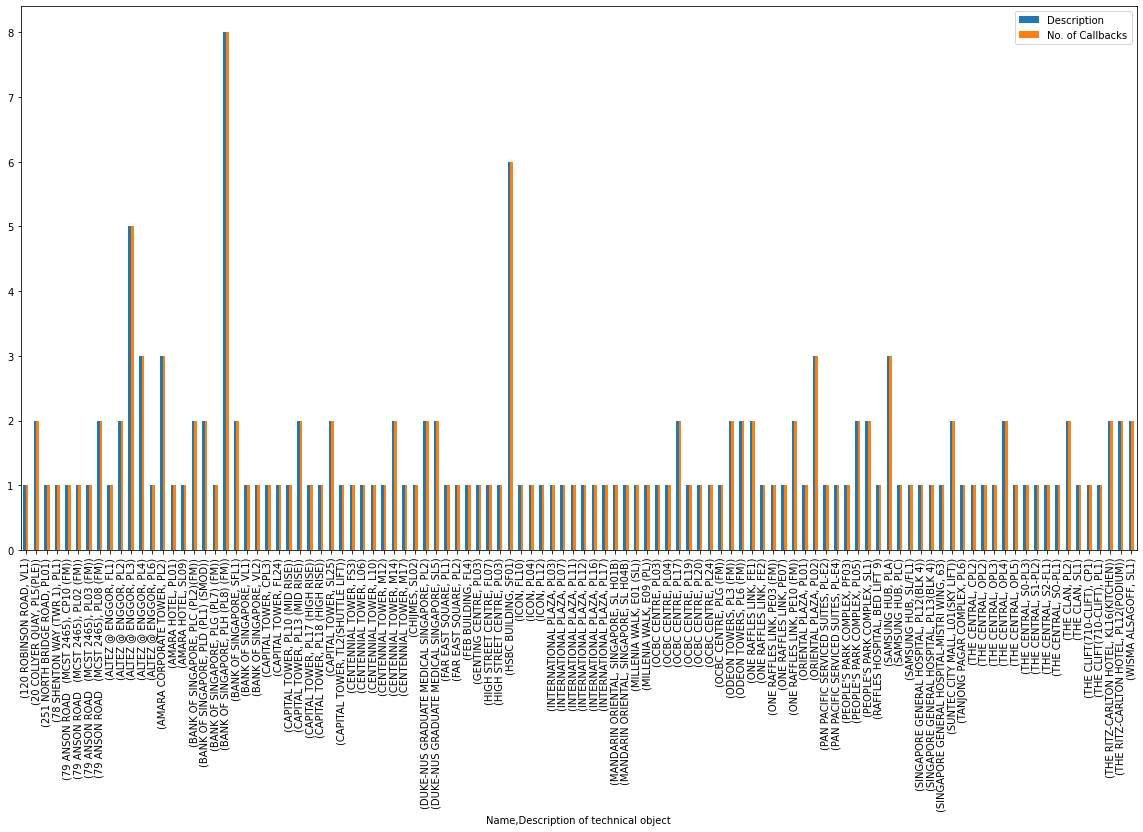

In [340]:
temp.groupby(['Name','Description of technical object']).count().plot(kind='bar',figsize=(20, 10))
# plt.xticks(rotation=30, horizontalalignment="center")
